In [14]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [25]:
rf = RandomForestClassifier(max_depth = 4)
data = load_iris()
rf.fit(data.data, data.target)
ests = rf.estimators_

dt1 = DecisionTreeClassifier(max_depth = 3)
dt2 = DecisionTreeClassifier(max_depth = 4)

dt1.fit(data.data, data.target)
dt2.fit(data.data, data.target)


DecisionTreeClassifier(max_depth=4)

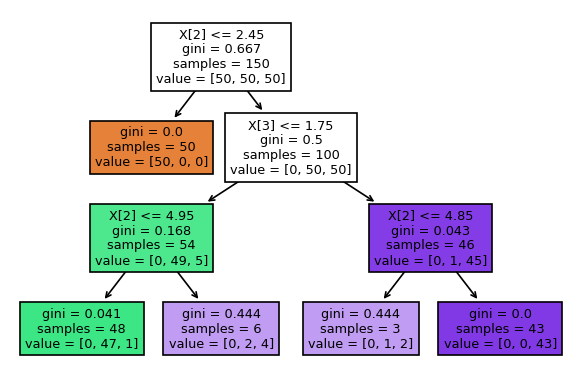

In [26]:
#plt.figure()
plt.rcParams["figure.dpi"] = 120
plot_tree(dt1, filled=True)
plt.show(
)
%matplotlib inline

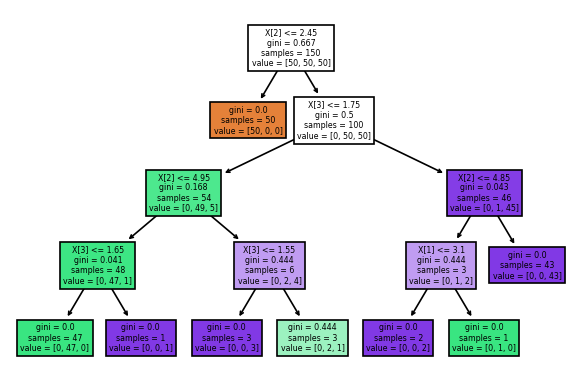

In [27]:
#plt.figure()
plt.rcParams["figure.dpi"] = 120
plot_tree(dt2, filled=True)
plt.show()
%matplotlib inline

In [33]:
print(dt1.tree_.children_left)
print()
print(dt1.tree_.children_right)


[ 1 -1  3  4 -1 -1  7 -1 -1]

[ 2 -1  6  5 -1 -1  8 -1 -1]


In [36]:
print(dt2.tree_.children_left)
print()
print(dt2.tree_.children_right)


[ 1 -1  3  4  5 -1 -1  8 -1 -1 11 12 -1 -1 -1]

[ 2 -1 10  7  6 -1 -1  9 -1 -1 14 13 -1 -1 -1]


In [47]:
n = 4
totalPossible = 2^1 + 2^2 +2^3 +2^4
import numpy as np

val = (2*(np.power(2,4) - 1))/(2-1)
val
 

30.0

In [97]:
leftList = dt1.tree_.children_left
rightList = dt1.tree_.children_right


treeCore = dt1.tree_
    
maxDepth = 3
maxNodes = 2*(np.power(2,maxDepth)-1)

modifiedChildLeft = list()
modifiedChildRight = list()
modifiedRuleMatrix = np.array(treeCore.decision_path(data.data.astype("float32")).todense()).astype("int")

insert = False
index = 0
while True:
    if index==maxNodes:
        print("break index == maxNodes")
        break
    if len(leftList)==maxNodes:
        print("break len(leftList) == maxNodes")
        break    
    
    if index<=len(leftList):
        item = leftList[index]
        # print(item)
        if item==-1:
            insert=True
    if insert:
        print(len(leftList), index)
        print(leftList)
        leftList = np.insert(leftList, index+1, 0)
        rightList = np.insert(rightList, index+1, 0)
        insert=False
    index+=1
    # print(est.max_depth)
    # print(est.decision_path([data.data[0]]))
    

9 1
[ 1 -1  3  4 -1 -1  7 -1 -1]
10 5
[ 1 -1  0  3  4 -1 -1  7 -1 -1]
11 7
[ 1 -1  0  3  4 -1  0 -1  7 -1 -1]
12 10
[ 1 -1  0  3  4 -1  0 -1  0  7 -1 -1]
13 12
[ 1 -1  0  3  4 -1  0 -1  0  7 -1  0 -1]
break len(leftList) == maxNodes


In [98]:
dt1.tree_.children_right

array([ 2, -1,  6,  5, -1, -1,  8, -1, -1])

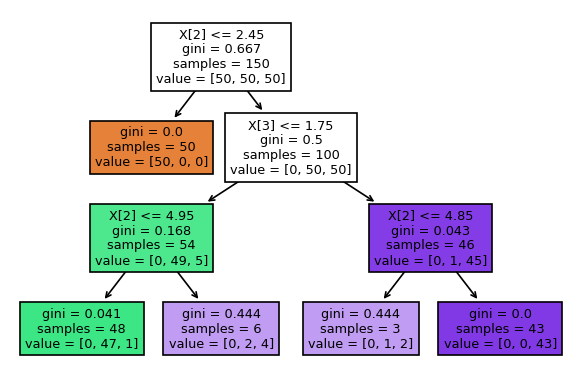

In [96]:
#plt.figure()
plt.rcParams["figure.dpi"] = 120
plot_tree(dt1, filled=True)
plt.show(
)
%matplotlib inline

In [ ]:
rightList

In [78]:
np.insert(a,3,1)

array([0, 1, 2, 1, 3, 4, 5, 6, 7, 8, 9])

In [79]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [99]:
ruleMatrix.shape

(150, 15)

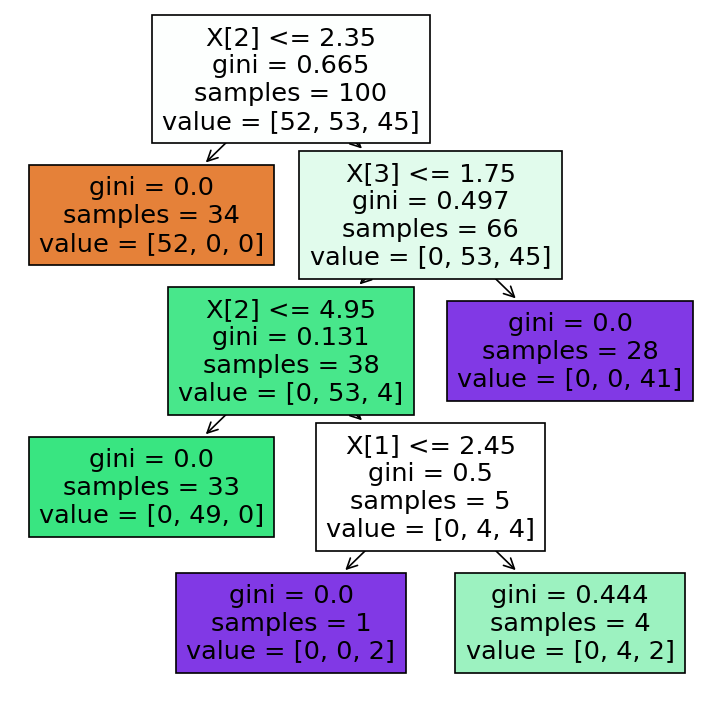

[ 1 -1  3  4 -1  6 -1 -1 -1]
[ 2 -1  8  5 -1  7 -1 -1 -1]
4


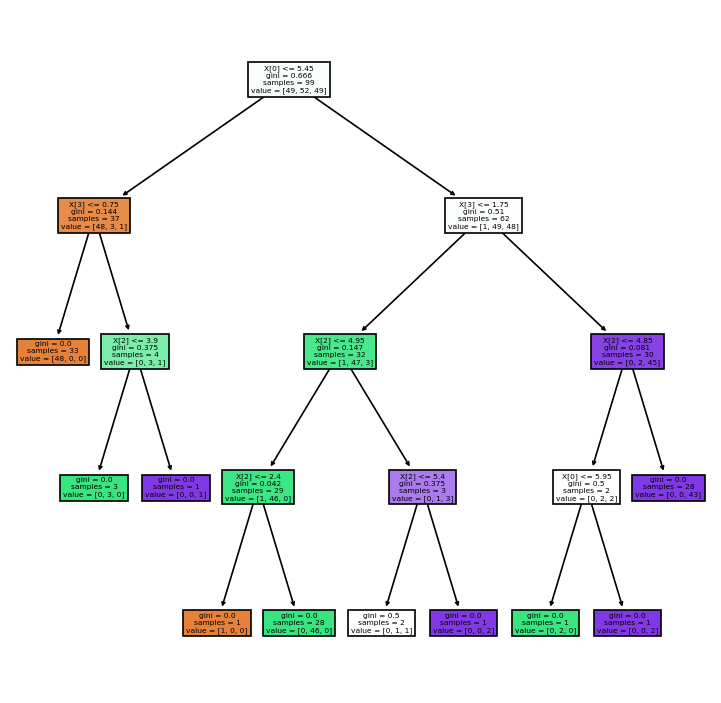

[ 1  2 -1  4 -1 -1  7  8  9 -1 -1 12 -1 -1 15 16 -1 -1 -1]
[ 6  3 -1  5 -1 -1 14 11 10 -1 -1 13 -1 -1 18 17 -1 -1 -1]
4


In [104]:
for est in ests[:2]:
    #plt.figure()
    plt.rcParams["figure.dpi"] = 120
    plt.figure(figsize = (7.5,7.5))
    plot_tree(est, filled=True)
    plt.show(
    )
    print(est.tree_.children_left)
    print(est.tree_.children_right)
    print(est.tree_)

%matplotlib inline

In [ ]:

[ 1 -1  3  4 -1  6 -1 -1 -1]
[ 2 -1  8  5 -1  7 -1 -1 -1]


[ 1 -1 0 0 0 0 0 3  4 -1  6 -1 -1 -1]
[ 2 -1 0 0 0 0 0 8  5 -1  7 -1 -1 -1]


In [115]:
est.tree_.

AttributeError: 'sklearn.tree._tree.Tree' object has no attribute '__dict__'

In [ ]:
# Naming convention is depth wise
# children list is depth wise